## Day 30 Lecture 2 Assignment

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In this assignment, you will work more independently. Perform the following steps:
    
1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
reviews.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
reviews = reviews.dropna()

reviews.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

(array([7.414e+03, 0.000e+00, 1.084e+03, 0.000e+00, 3.970e+02, 0.000e+00,
        4.610e+02, 0.000e+00, 3.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

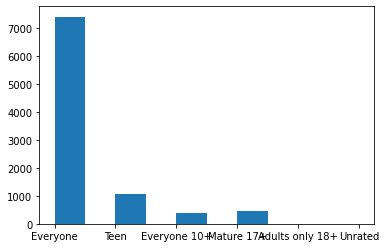

In [6]:
plt.hist(reviews['Content Rating'])

In [7]:
reviews['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [8]:
reviews['Content Rating'] = reviews['Content Rating'].apply(lambda x: np.nan if x == "Adults only 18+" else x)
reviews['Content Rating'] = reviews['Content Rating'].apply(lambda x: np.nan if x == "Unrated" else x)

reviews.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    4
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
reviews = reviews.dropna()

In [10]:
reviews.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
reviews['Rating > 4.5'] = np.where(reviews['Rating'] >= 4.5, 1, 0)

In [12]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating > 4.5
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [13]:
reviews = reviews.drop('Rating', axis = 1)

reviews.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating > 4.5
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [14]:
reviews['Price'] = pd.to_numeric(reviews['Price'].str.strip("$"))

In [15]:
reviews['Installs'].value_counts()

1,000,000+        1575
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           535
50,000+            465
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9356 non-null   object 
 1   Category        9356 non-null   object 
 2   Reviews         9356 non-null   object 
 3   Size            9356 non-null   object 
 4   Installs        9356 non-null   object 
 5   Type            9356 non-null   object 
 6   Price           9356 non-null   float64
 7   Content Rating  9356 non-null   object 
 8   Genres          9356 non-null   object 
 9   Last Updated    9356 non-null   object 
 10  Current Ver     9356 non-null   object 
 11  Android Ver     9356 non-null   object 
 12  Rating > 4.5    9356 non-null   int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.3+ KB


In [17]:
reviews = reviews.drop(['Last Updated', 'Current Ver', 'Android Ver', 'Size', 'App'], axis=1)

In [18]:
reviews.head()

,Category,Reviews,Installs,Type,Price,Content Rating,Genres,Rating > 4.5
0,ART_AND_DESIGN,159,"10,000+",Free,0.0,Everyone,Art & Design,0
1,ART_AND_DESIGN,967,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,87510,"5,000,000+",Free,0.0,Everyone,Art & Design,1
3,ART_AND_DESIGN,215644,"50,000,000+",Free,0.0,Teen,Art & Design,1
4,ART_AND_DESIGN,967,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,0


In [19]:
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'], errors='coerce')

In [20]:
!pip install category_encoders

In [21]:
from sklearn.model_selection import train_test_split

X = reviews.drop('Rating > 4.5',axis=1)
y = reviews['Rating > 4.5']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

cat_encode = LeaveOneOutEncoder()

cat_encode.fit(X_train, y_train)

X_train_encode = cat_encode.transform(X_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train_encode, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import classification_report

X_test_encode = cat_encode.transform(X_test)
y_pred = forest.predict(X_test_encode)

In [25]:
print("Train score: ",forest.score(X_train_encode, y_train))
print("Test score: ",forest.score(X_test_encode, y_test))

Train score:  0.9899786210582576
Test score:  0.7313034188034188


              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1275
           1       0.58      0.55      0.57       597

    accuracy                           0.73      1872
   macro avg       0.69      0.68      0.69      1872
weighted avg       0.73      0.73      0.73      1872



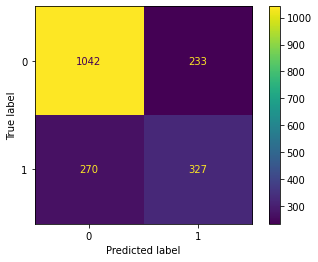

In [26]:
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test, y_pred))

plot_confusion_matrix(forest, X_test_encode, y_test, values_format='.5g')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [10,30,50,100], 'min_samples_split': [30,50,100,200], 'max_features': ['sqrt', .5], 'n_estimators': [10,50,100]}

forest = RandomForestClassifier()

forest_grid = GridSearchCV(forest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

forest_grid.fit(X_train_encode, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
print("Best max depth hyperpararmeter: ",forest_grid.best_estimator_.max_depth)
print("Best min sample sizes hyperpararmeter: ",forest_grid.best_estimator_.min_samples_split)
print("Best max features hyperpararmeter: ",forest_grid.best_estimator_.max_features)
print("Best number of trees hyperpararmeter: ",forest_grid.best_estimator_.n_estimators)

Best max depth hyperpararmeter:  30
Best min sample sizes hyperpararmeter:  30
Best max features hyperpararmeter:  0.5
Best number of trees hyperpararmeter:  50


In [29]:
grid_pred = forest_grid.best_estimator_.predict(X_test_encode)

print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1275
           1       0.64      0.42      0.51       597

    accuracy                           0.74      1872
   macro avg       0.70      0.65      0.66      1872
weighted avg       0.72      0.74      0.72      1872



Our precision for Cat>4.5 improves to 0.66 using the CV grid vs 0.62 with the default hyperparameters, while precision and recall decrease for negatives (not in Cat>4.5).

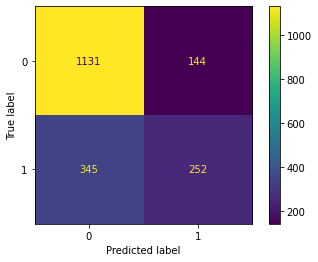

In [30]:
plot_confusion_matrix(forest_grid.best_estimator_, X_test_encode, y_test, values_format='.5g')
plt.show()

In [31]:
print("Train score: ", forest_grid.score(X_train_encode, y_train))
print("Test score: ", forest_grid.score(X_test_encode, y_test))

Train score:  -0.4251889886968295
Test score:  -0.5110948529558371


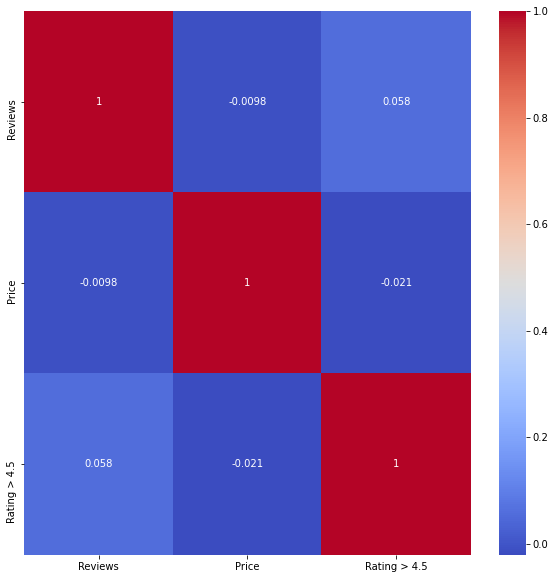

In [32]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(reviews.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

For some reason our Train and Test score on with the CV grid are negative. Apparently this can be from features correlating very poorly. This is exactly what we see in our correlation matrix. No correlation is stronger than .058. 

In [33]:
forest_importance = pd.Series(forest_grid.best_estimator_.feature_importances_, index=X_train_encode.columns).sort_values(ascending=False)
forest_importance

Reviews           0.411727
Installs          0.203395
Genres            0.186850
Category          0.113066
Content Rating    0.039068
Price             0.034167
Type              0.011727
dtype: float64